# Python Course on Classes and Functional Programmaing

## Classes - Inheritance

In [46]:
import time
print ' Last revision ', time.asctime()

 Last revision  Thu Nov  3 20:49:24 2016


### Concept of inheritance 

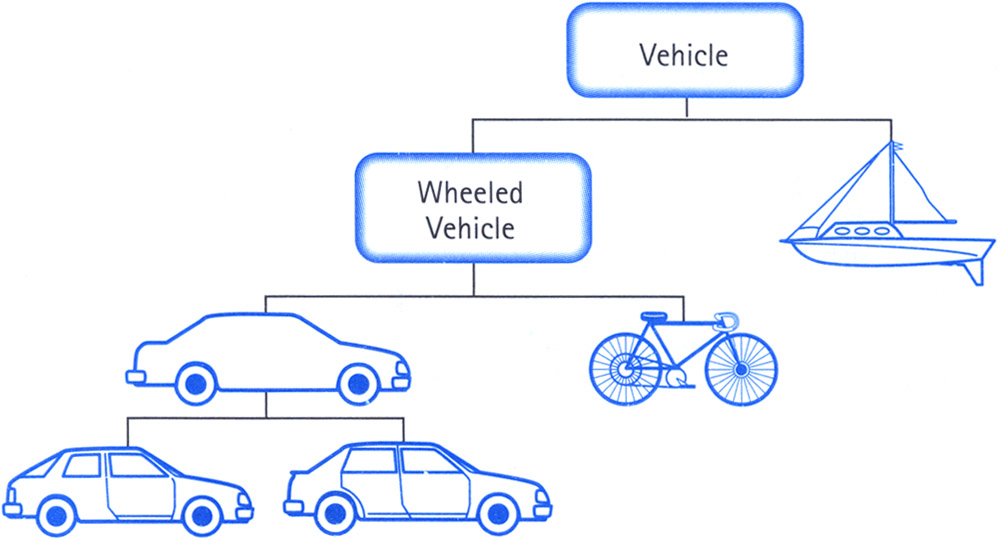

In [47]:
from IPython.display import Image, display
display(Image('img/classes_inheritance.jpeg',width=500))

The previous figure shows a tree of vehicles. All of them are vehicles, but the boat, of course, has not wheels. A bike is a wheeled vehicle, as a car is. But a car can has at least four wheels like bikes only two.

Inheritance in OO lenguages allows you to set this tree of dependences between classes. The attributes and methods of the mother class are inherited from the daughther class. Daughter classes are called derived classes. In some cases, they can be modified! For example, a vehicle class can have a method *run*, the speed of each vehicle will be different, some of them will run on the water surface, other not. The method *run* could be over-writen by the derived class.

Consider the matrix class, there is a subclass that is the squared matrix, with the same number of row and columns, it is an specifc case of a general matrix. It derives from the matrix class.

Inheritance allows you to write code in different levels. There is a basic code that can run on all kind of vehicles, there is a more specific code that can run only in bicicles, and other than runs only in cars. If you hace a code that runs in vehicles, when you create a new vehicle class, for example train, the code will also run for trains! This makes the code reusable. 

Inheritance is fundamental in some lenguages, for example C++. This is not the case in Python. Rarely you will find derived classes. The reason is that Python is so strongly typed. We will come to this later.  

### Interface and Base class

There are two types of promordial mother classes, they are called *Interface* or *Base class*.
The difference between both is its use.

We define an *Interface* when we want to inforce that the derived classes have a given set of methods. An *Interface* has virtual method, that is, they do anything.

A *Base class* is a class expected to have some derived classes, but all its methods are implemented, they provide a basic behavior. The derived classes can change that behavior.

A *Base class* has a constructor, while an *Interface* has not.

The following is an example of an interface. It defines de method we expect to have any Shape class. They are: *perimeter* and *area*. The example contains two derived classes: *rectangle* and *Disk* that implement these methods. The is a third derived class, *square*, that derives from *rectagle*.

In [48]:
%%writefile shapes.py

import math

class IShape:
    """ Interface for Shape classes, defines the perimeter and area methods
    """
    
    def perimeter(self):
        """ returns the perimeter of the shape
        """
        return None
    
    def area(self):
        """ returns the area of the shape
        """
        return None
    
    
class Disk(IShape):
    """ Disk Shape class
    """
    
    def __init__(self, radius):
        self.radius = radius
        return
        
    def perimeter(self):
        return 2.*math.pi*self.radius
    
    def area(self):
        return math.pi*self.radius*self.radius
    
    
class Rectangle(IShape):
    """ Rectangle Shape class
    """
    
    def __init__(self, width, height):
        self.width = width
        self.height = height
        return
    
    def perimeter(self):
        return 2.*(self.width+self.height)
    
    def area(self):
        return self.width*self.height
    
    
class Square(Rectangle):
    """ Square Shape class
    """
    
    def __init__(self, size):
        Rectangle.__init__(self, size, size)
        return
    

Overwriting shapes.py


The *IShape* class is an *Interface*, it is pure virtual, has no constructor, and its method are empty. It purpouse is to force all the derived classes to implement those methods.

The *Disk* and *Rectangle* classes are derived from *IShape*. The syntax to define a derived class is to put between () in the class definition line the name of the mother class.
Both classes have normal constructors and they implement the methods of the interface.

The *Square* class derives from *Rectangle*. It has a constructor, that calls the constructor of a *Rectangle*! Notice the syntax: it pass the *self* to be configured by the constructor of Rectangle!

The *Square* class reuses the *perimeter* and *area* methods of its mother class. They do not need to be implemented.

In the next cell, we construct a rectangle, a square and a disk, and then we compute the total area of the tree.

In [49]:
disk = Disk(1.)
rectangle = Rectangle(1., 2.)
square = Square(2.)

areas = map(lambda x: x.area(), [disk, rectangle, square])
print 'Areas ', areas
print 'Total area ', sum(areas)

pers =  map(lambda x: x.perimeter(), [disk, rectangle, square])
print 'Perimeters ', pers
print 'Total perimeters length ', sum(pers)

Areas  [3.141592653589793, 2.0, 4.0]
Total area  9.14159265359
Perimeters  [6.283185307179586, 6.0, 8.0]
Total perimeters length  20.2831853072


As we said before, in Python, inheritance is not common. Consider the case that the *Disk* and *Rectangle* classes do not inherit from *IShape* but still they implement the methods *perimeter* and *area*. In that case, does the code of the previous cell still work? 

The answer is yes! It will work because Python is not strongly typed. for the *x.perimeter()* statement to work, the only thing needed is that *x* is of type that has defined a *perimeter* method. It does not require that it previously derives from *IShape*! If we keep the interface  and use them, is just to remind us and other developers that better implement these two methods!

### Exceptions

Exceptions in Python are classes. There is a tree of derived classes depending on the type of the exception. 

See the following frame!

In [50]:
from IPython.display import IFrame
IFrame('https://docs.python.org/2/library/exceptions.html#exception-hierarchy',
       width=800, height=350)

For example *ZeroDivisionError* derives from *AritmeticError*, that it turs, comes from *StandardErrot*, etc.

When catching exceptions, you can decide to cath the derived class or the mother class. Let's see it with the following example.

In [51]:
x, y = 1., 0.

try:
    z = x/y
except ZeroDivisionError:
    print ' Division by zero! '
    
try:
    z = x/y
except ArithmeticError:
    print ' Aritmetic Error! '


 Division by zero! 
 Aritmetic Error! 


You can implement your own exception class derived for example from *ZeroDivisionError*.

In [52]:
class ToleranceDivisionError(ZeroDivisionError):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return str(self.value)
    
y = 1e-8
try:
    if (abs(y) < 1e-6):
        raise ToleranceDivisionError(y)
except ZeroDivisionError:
    print 'Tolerance Division Error!'

Tolerance Division Error!
